# Category Wordcloud 

The purpose of this notebook is find the frequency of categories in a visual wordcloud. 

* The dataset for this purpose was taken from expanded list of categories got from cleaning the Yelp dataset in Yelp_Restaurants_Cleaning_Final.ipynb
* The words "Restaurants" and "Food" was removed from the list to find only the frequency of occurances of types of restaurant establishments. 
* The list was then converted into a pdf which is used as the dataset in this excercise. 

code adapted from [Wordcloud](https://python-graph-gallery.com/wordcloud/)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [4]:
# For importing the PDF and extracting the text
import PyPDF2

# creating a pdf file object
# Must read as binary, hence 'rb' parameter
pdfFileObj = open('../Resources/category_wordcloud.pdf', 'rb')

In [6]:
# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# printing number of pages in pdf file
print("pages in PDF: {}".format(pdfReader.numPages))

pages in PDF: 20


In [7]:
# Create a list
# Add the text from each page to the list
report_list = []
for i in range(pdfReader.numPages):
    report_list.append(pdfReader.getPage(i).extractText())


In [8]:
# Join the list of pages together, then split it by space
rpt_word_list = (' '.join(report_list)).split(' ')


In [9]:
# Perform a join and split on each of these symbols
other_char_split = [";", ",", ".", "?",
                    "(", ")", "/", "\*", "[", "]", "'", "~", ":"]

In [10]:
for splitter in other_char_split:
    rpt_word_list = (splitter.join(rpt_word_list)).split(splitter)


In [11]:
# Remove empty from list
# If there is no text in the pdf, report_list will be empty after this
rpt_word_list = list(filter(lambda x: x not in ["", " "], rpt_word_list))
print("words after filter: {}".format(len(rpt_word_list)))

# closing the pdf file object
pdfFileObj.close()

words after filter: 6530


In [12]:
# For a quick and easy function to return a dictionary of word counts for exploration
from collections import Counter

# For viewing our word list
import pandas as pd 

# Also import STOPWORDS, a set of common English words to remove from our potential words (such as: a, and, but)
from wordcloud import STOPWORDS

# To see the words that matter, let's filter based on some conditions
def filter_words(x):
    # Not in common English words
    cond_1 = x.lower() not in STOPWORDS
    # Not a number
    cond_2 = not x.isnumeric()
    # Length of at least 3
    cond_3 = len(x)>2
    return cond_1 and cond_2 and cond_3

# Counts of each word
counts = Counter(rpt_word_list)
# Convert to DataFrame for our viewing pleasure
counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['count'])
counts_df.index.name = 'word'
counts_df.reset_index(inplace=True)
# Apply word filter from function above
counts_df = counts_df[counts_df['word'].apply(filter_words)]
counts_df.set_index('word', inplace=True)
# Sort by count descending and show the top 10 words
counts_df.sort_values('count', ascending=False).head(10)

,count
word,
Bars,309
American,266
Sandwiches,188
Nightlife,164
Fast,158
Pizza,149
Traditional,147
Breakfast,145
Brunch,145


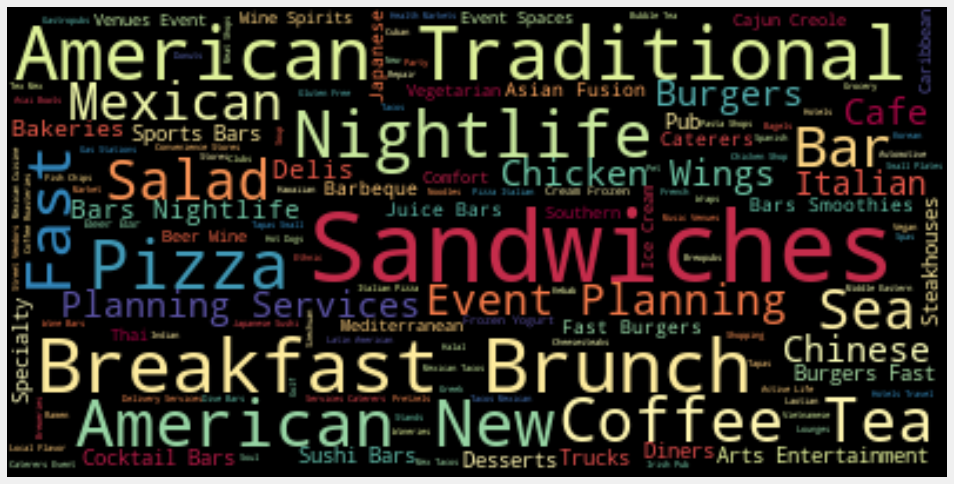

In [17]:
# Make the figure
wordcloud = WordCloud(random_state=80, contour_width=1,background_color = 'black', contour_color='orange',
                      colormap="Spectral_r").generate(" ".join(rpt_word_list))

# Create matplotlib figure
fig = plt.figure(figsize=(15, 15))

# Display image on our figure
plt.imshow(wordcloud, interpolation="bilinear")

# Turn off axes and set a dark background to avoid a white area saved around the image
plt.axis("off")
plt.style.use('fivethirtyeight')
plt.show()


The resulting wordcloud shows that “Sandwiches” is the most common word based on its size. However, “Bars” is not the first most frequent word as was previously shown from the word count. We can see that certain two-word items are included, such as “Bars Nightlife” or “Juice Bars”.

The default for the WordCloud is to consider bigrams (tokens of two words) in the frequency counts. The effect of this parameter is to consider cases of “Bars Nightlife” and “Juice Bars” as distinct from “Bars”. 


# Make wordcloud in a shape

In [40]:
#code apadted from (https://github.com/amueller/word_cloud)

# After converting image to bits, we store as a numpy array
from wordcloud import WordCloud, STOPWORDS
import numpy as np

# For plotting image
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# For importing our image and converting the content into bytes for the Image package
import requests
from io import BytesIO

# To read the image data
from PIL import Image   

# Import Wordcloud
# Also import STOPWORDS, a set of common English words to remove from our potential words (such as: a, and, but)
from wordcloud import WordCloud, STOPWORDS


# Load the image path. image taken from https://wpclipart.com/

# Use requests to get the image data and then uses BytesIO and Image.open() to import the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Create the wave_mask by converting the image data into a numpy array
wave_mask = np.array(img)

stopwords = set(STOPWORDS)

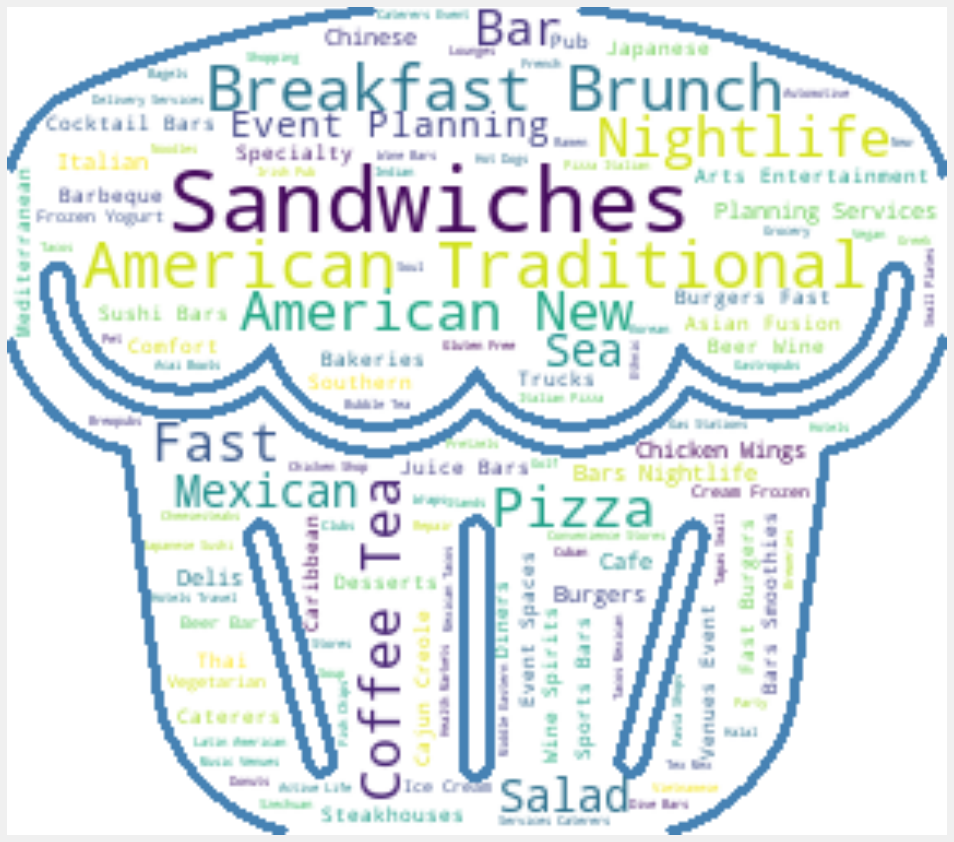

In [57]:
# Make the figure
#wordcloud = WordCloud(mask=wave_mask, random_state=80, contour_width=3, colormap="rainbow_r", 
                     #contour_color='steelblue').generate(" ".join(rpt_word_list))
wordcloud = WordCloud(mask=wave_mask, random_state=80, contour_width=3, background_color="white", max_words=2000,
                      stopwords=stopwords, contour_color='steelblue').generate(" ".join(rpt_word_list))

#wordcloud = WordCloud(mask=wave_mask, random_state=80, contour_width=3, background_color = 'black',
                      #colormap="Spectral_r", max_words=2000, stopwords=stopwords,
                      #contour_color='steelblue').generate(" ".join(rpt_word_list))

    
    
# Create matplotlib figure
fig = plt.figure(figsize=(15, 15))

# Display image on our figure
plt.imshow(wordcloud, interpolation="bilinear")

# Turn off axes and set a dark background to avoid a white area saved around the image
plt.axis("off")
plt.style.use('fivethirtyeight')
plt.show()

**colormap** supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
